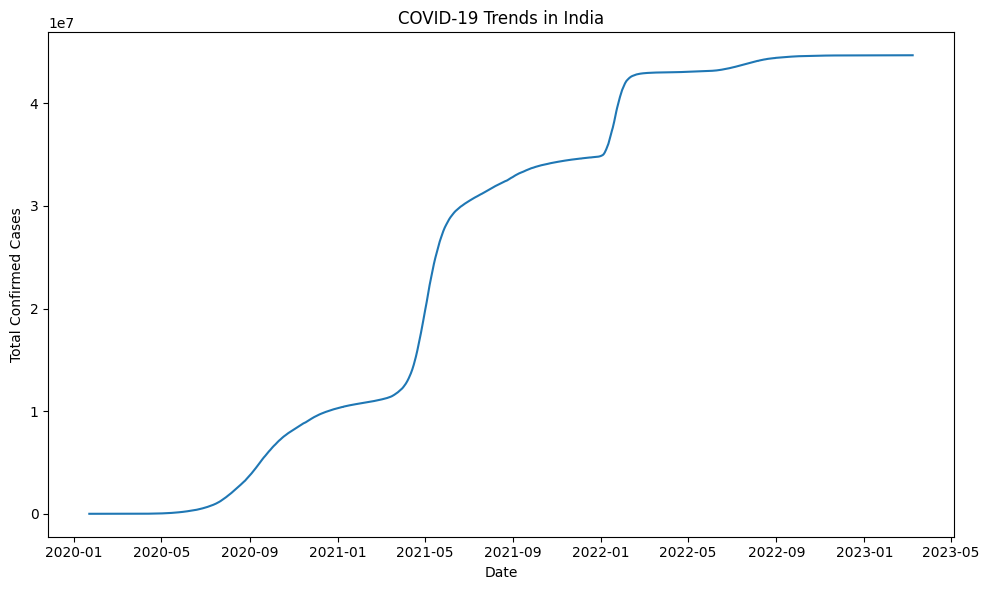

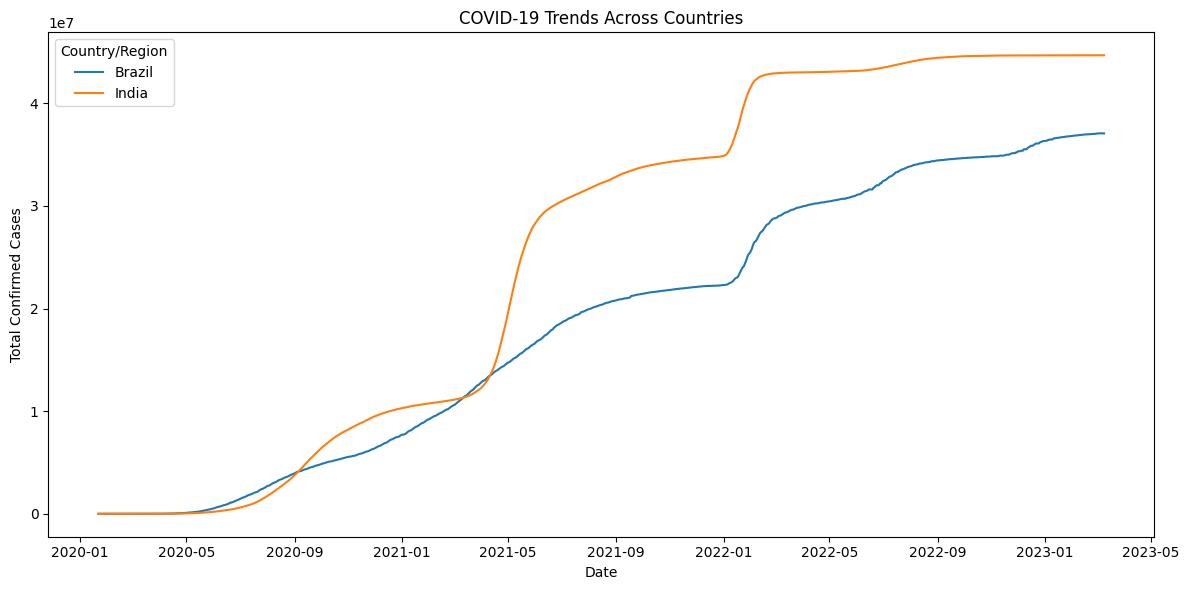

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" \
      "csse_covid_19_data/csse_covid_19_time_series/" \
      "time_series_covid19_confirmed_global.csv"

covid_data = pd.read_csv(url)

# Step 2: Convert wide format to long format
covid_long = covid_data.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    var_name="Date",
    value_name="ConfirmedCases"
)

# Step 3: Convert Date column properly
covid_long["Date"] = pd.to_datetime(covid_long["Date"], format="%m/%d/%y")

# Step 4: Aggregate to country-level
covid_long = covid_long.groupby(
    ["Country/Region", "Date"], as_index=False
)["ConfirmedCases"].sum()

# Step 5: India trends
india_trends = covid_long[covid_long["Country/Region"] == "India"]

plt.figure(figsize=(10, 6))
plt.plot(india_trends["Date"], india_trends["ConfirmedCases"])
plt.title("COVID-19 Trends in India")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()

# Step 6: Multi-country comparison
countries = ["India", "United States", "Brazil"]
comparison = covid_long[covid_long["Country/Region"].isin(countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison, x="Date", y="ConfirmedCases", hue="Country/Region")
plt.title("COVID-19 Trends Across Countries")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()
